<a href="https://colab.research.google.com/github/nudumulla2019/Biostatistics-5195/blob/master/Biostatistics_Lab_3_Functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

<img src = 'https://miro.medium.com/max/2670/1*plcDnA6sjme0RWvxbvaWgg.png'>

<img src='https://user-images.githubusercontent.com/35667308/48126015-2354ab00-e2a6-11e8-9a22-c58ad6ee7733.png'>

In [ ]:
# Get Data file here
# https://drive.google.com/file/d/1Qunag0Gsslz80Jgiyi_tv8d1d8wxRr4l/view?usp=sharing

In [3]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-7vqnmmv2
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-7vqnmmv2
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=7323 sha256=3feb7144c876b0341146496c1da3f3d6efc99e06c06a8aee857b4127738aacaa
  Stored in directory: /tmp/pip-ephem-wheel-cache-y7pg03jl/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
drive.mount('/content/drive')# moute the drive

Mounted at /content/drive


In [8]:
dataset = pd.read_csv('/content/drive/My Drive/Iris_data/iris.csv') #Load the dataset

In [9]:
dataset# overview about dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


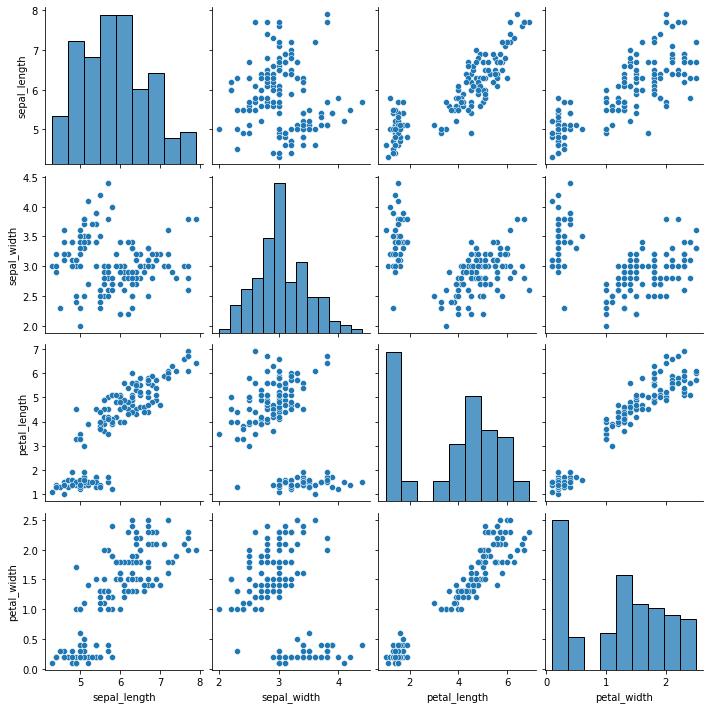

In [10]:
g = sns.pairplot(dataset) # pairplot for each variables

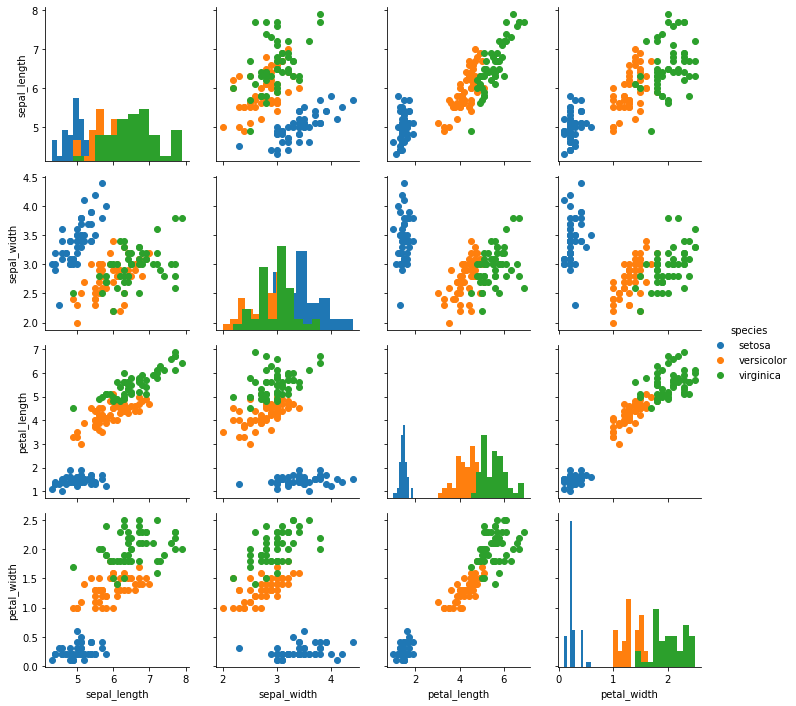

In [11]:
g = sns.PairGrid(dataset, hue="species") # pareplot for each 2 pair of varoables for different species
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [12]:
target_data = dataset[['species']]           # all the data values without species
input_data = dataset.drop(['species'],axis=1)

In [13]:
input_data = np.array(input_data)# convert list to an array

In [ ]:
input_data

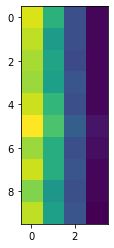

In [ ]:
plt.imshow(input_data[0:10,:]) #plot of the first 10 data

In [ ]:
target_data = pd.get_dummies(target_data.species)# outputs

In [ ]:
target_data 

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
_, target_data = np.where(target_data==1)

In [ ]:
target_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
r = np.random.permutation(input_data.shape[0])

In [ ]:
cut = int(0.8*len(r))

In [ ]:
input_data.shape

(150, 4)

In [ ]:
X = input_data[r[:cut],:]
X_test = input_data[r[cut:],:]
Y = target_data[r[:cut]]
Y_test = target_data[r[cut:]]

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def gradient_step(w):

    for j in range(len(w)): 

            w[j].data = w[j].data - c.h*w[j].grad.data
            
            w[j].grad.data.zero_()

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [ ]:
def relu(x):
    return x * (x > 0)

In [ ]:
def model(x,w):

    for j in range(len(w)):

        x = relu(matmul(x,w[j]))

    return x

In [ ]:
wb.init(project="Iris");
c = wb.config

c.h = 0.05
c.b = 20
c.layers = 3 
c.epochs = 2500

c.f_n = [4,16,16,3]

w = [ GPU(randn_trunc((c.f_n[i],c.f_n[i+1]))) for i in range(c.layers) ]

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    loss.backward()

    gradient_step(w)
   
    if (i+1) % 1 == 0:

        make_plots()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Offline run mode, not syncing to the cloud.
wandb: W&B syncing is set to `offline` in this directory.  Run `wandb online` to enable cloud syncing.


In [ ]:
acc(model(X,w),Y)

0.6916666666666667

In [ ]:
acc(model(X_test,w),Y_test)

0.5666666666666667

In [ ]:
X[0]

tensor([5.3000, 3.7000, 1.5000, 0.2000], device='cuda:0')

In [ ]:
model(X[0],w)

tensor([10.0187, -0.0000, -0.0000], device='cuda:0', grad_fn=<MulBackward0>)

In [ ]:
torch.argmax(model(X[0],w))

tensor(0, device='cuda:0')

In [ ]:
Y[0]

tensor(0., device='cuda:0')

In [ ]:
w

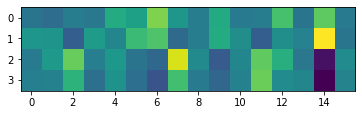

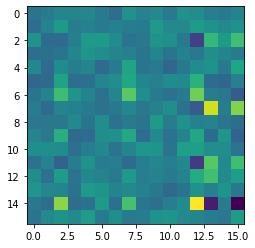

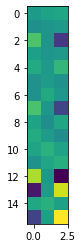

In [ ]:
for i in range(len(w)):

    plt.imshow(w[i].cpu().detach().numpy())
    plt.show()

In [ ]:
def softplus(x):
    return torch.log(1+torch.exp(x))

In [ ]:
def model(x,w):

    for j in range(len(w)):

        x = softplus(matmul(x,w[j]))

    return x